# K-MEANS CLUSTERING

Using k-means clustering on the dataset and finding the ultimate centres.
Implementation using
- scikit learn, and 
- python

#### IMPORTING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\harsh\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\harsh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Importing KMeans from sklearn.cluster for clustering and importing make_blobs from sklearn.datasets._samples_generator for making dataset.

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets._samples_generator import make_blobs

In [3]:
X, y = make_blobs(n_samples=300, cluster_std=1.0, random_state=42)

##### PLOTTING THE DATA

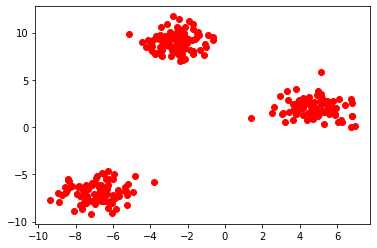

In [4]:
plt.scatter(X[:, 0], X[:, 1], color='red');

# USING SKLEARN FOR CLUSTERING

Getting the best parameters

C:\Users\harsh\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  "KMeans is known to have a memory leak on Windows "


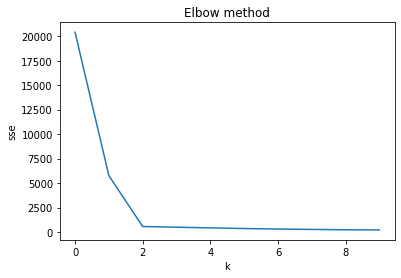

In [5]:
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.plot(sse)
plt.xlabel('k')
plt.ylabel('sse')
plt.title('Elbow method');

Fitting model on best parameter

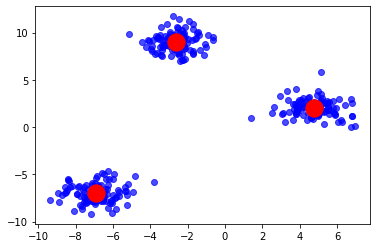

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, color='red');

In [7]:
kmeans.cluster_centers_

array([[-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [ 4.74710337,  2.01059427]])

# Using Python

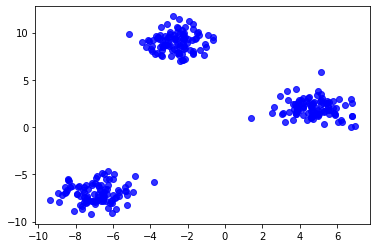

In [8]:
plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.8)

Selecting 3 random k

### RANDOM INITIALIZATION and plotting

[array([-3.80074638, -5.76053468]), array([-3.34841515,  8.70507375]), array([4.62763206, 1.07591531])]


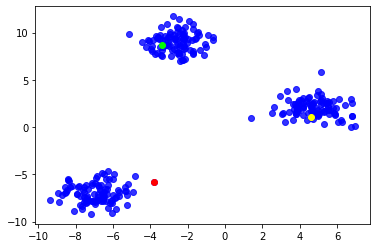

In [9]:
k = 3
random_init = []
for i in range(k):
    n = np.random.randint(150)
    random_init.append(X[n, :])
    
print(random_init)

plt.scatter(X[:, 0], X[:, 1], color='blue', alpha=0.8)
cols = ['red', 'lime', 'yellow']
for i in range(k):
    plt.scatter(random_init[i][0], random_init[i][1], color=cols[i])

## Getting points by updating parameters

In [10]:
k_points = random_init
def update_points(X, k, k_points):
    c_vector = []
    mu = {}

    for i in range(0, len(X)):
        euc_dist = []
        trace = {}
        for j in range(k):
            dist = np.sqrt(np.sum([np.square(X[i][0] - k_points[j][0]), np.square(X[i][1] - k_points[j][1])]))
            euc_dist.append(dist)

        index = np.where(euc_dist == np.amin(euc_dist))[0][0]
        c_vector.append(index)


    for i in range(k):
        mu['mu' + str(i)] = 0
        mu['k-' + str(i)] = [0, 0]

    for i in range(len(c_vector)):
        mu['mu' + str(c_vector[i])] += 1
        mu['k-' + str(c_vector[i])] += X[i, :]

    k_points = []
    for i in range(k):
        mu['k-' + str(i)] /= mu['mu' + str(i)]
        k_points.append(mu['k-' + str(i)])
        
    return mu, c_vector, k_points

mu, c_vector, k_points = update_points(X, 3, k_points)

print(mu)
print(random_init)
print(k_points)

{'mu0': 100, 'k-0': array([-6.88387179, -6.98398415]), 'mu1': 100, 'k-1': array([-2.63323268,  9.04356978]), 'mu2': 100, 'k-2': array([4.74710337, 2.01059427])}
[array([-3.80074638, -5.76053468]), array([-3.34841515,  8.70507375]), array([4.62763206, 1.07591531])]
[array([-6.88387179, -6.98398415]), array([-2.63323268,  9.04356978]), array([4.74710337, 2.01059427])]


## Iteration for best parameters

In [11]:
def iterations(X, k, k_points):
    print(k_points)
    k_pts = np.array([[0, 0], [0, 0], [0, 0]])
    while not(k_pts == k_points).all():
        k_pts = np.array(k_points)
        mu, c_vector, k_points = update_points(X, k, k_points)
        print(k_points)
    return mu, c_vector, k_points

mu, c_vector, k_points = iterations(X, 3, k_points)
print(mu)
print(k_points)

[array([-6.88387179, -6.98398415]), array([-2.63323268,  9.04356978]), array([4.74710337, 2.01059427])]
[array([-6.88387179, -6.98398415]), array([-2.63323268,  9.04356978]), array([4.74710337, 2.01059427])]
{'mu0': 100, 'k-0': array([-6.88387179, -6.98398415]), 'mu1': 100, 'k-1': array([-2.63323268,  9.04356978]), 'mu2': 100, 'k-2': array([4.74710337, 2.01059427])}
[array([-6.88387179, -6.98398415]), array([-2.63323268,  9.04356978]), array([4.74710337, 2.01059427])]


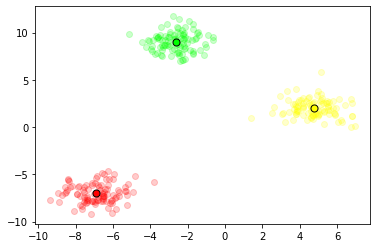

In [12]:
cols = ['red', 'lime', 'yellow']
for i in range(len(X)):
    plt.scatter(X[i, 0], X[i, 1], color=cols[c_vector[i]], alpha=0.2)
for i in range(k):
    plt.scatter(k_points[i][0], k_points[i][1], color=cols[i], edgecolors='black', s=50)

### CHECKING THE RESULT WITH SKLEARN RESULTS

In [13]:
kmeans.cluster_centers_

array([[-2.63323268,  9.04356978],
       [-6.88387179, -6.98398415],
       [ 4.74710337,  2.01059427]])

In [14]:
np.array(k_points)

array([[-6.88387179, -6.98398415],
       [-2.63323268,  9.04356978],
       [ 4.74710337,  2.01059427]])

In [15]:
kmeans.cluster_centers_ == np.array(k_points)

array([[False, False],
       [False, False],
       [False,  True]])